# Énfasis en la Visualización de Indices

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd
import matplotlib
import plotly.express as px
import numpy as np
matplotlib.use("Agg")
import plotly.io as pio
pio.renderers.default = "notebook"  # Usa el renderer para Jupyter Notebook
# Si vas a exportar como HTML y necesitas imágenes
pio.renderers.default = "png"  # Gráficos estáticos como imágenes PNG
pio.renderers.default = "svg"  # Formato vectorial



# Comportamiento entre variables

In [3]:
filepath = "finalpymes.xlsx"
df = pd.read_excel(filepath)

In [125]:
df.shape

(141621, 29)

El dataset original, compuesto por 141,621 registros y 29 variables, fue presentado y analizado en su estado inicial. Sin embargo, para garantizar un análisis más preciso y representativo, se decidió realizar una modificación en los datos, filtrando exclusivamente aquellas empresas que reportaron servicio de deuda (SD > 0). Esta selección se implementó con el siguiente código:

In [181]:
data = df[df['SD']>0]

En el dataset inicial, la inclusión de empresas que no reportaban servicio de deuda resultaba en valores acumulados muy positivos, distorsionando significativamente los resultados descriptivos y gráficos generados. Al eliminar estos registros, se logró reducir esta distorsión, permitiendo un análisis más alineado con los objetivos del estudio.

In [ ]:
data.shape

(37168, 29)

Como resultado de este filtro, el dataset se redujo a 37,168 registros y 29 variables, lo que representa únicamente las empresas relevantes para el análisis.

En esta etapa, exploraremos el comportamiento general de las variables en el dataset, poniendo especial atención a la interacción entre las variables numéricas y categóricas. Este análisis permitirá identificar patrones, relaciones y posibles insights que no se evidenciaron en la revisión inicial de las características generales del dataset

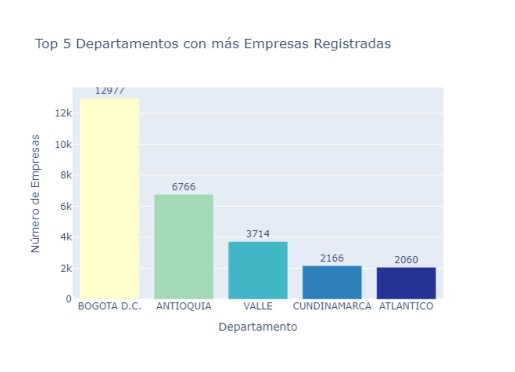

In [4]:
empresa_counts = datan["Departamento"].value_counts().reset_index()
empresa_counts.columns = ["Departamento", "Cantidad de Empresas"]

top_departments = empresa_counts.head(5)

custom_colors = ['#ffffcc', '#a1dab4', '#41b6c4', '#2c7fb8', '#253494']

fig = px.bar(
    top_departments,
    x="Departamento",
    y="Cantidad de Empresas",
    title="Top 5 Departamentos con más Empresas Registradas",
    text="Cantidad de Empresas",
    labels={"Departamento": "Departamento", "Cantidad de Empresas": "Número de Empresas"},
    color="Departamento",  # Usar la columna para asignar colores
    color_discrete_sequence=custom_colors  # Aplicar la gama de colores
)

fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(
    yaxis=dict(title="Número de Empresas"),
    xaxis=dict(title="Departamento"),
    showlegend=False  # Ocultar leyenda
)

fig.show()

La gráfica resalta los cinco departamentos con más empresas registradas, con Bogotá D.C. liderando con 12,977 empresas, seguido de Antioquia con 6,766, Valle con 3,714, y Cundinamarca y Atlántico con cifras más moderadas de 2,166 y 2,060, respectivamente. Esto refleja una marcada concentración empresarial en las regiones centrales y principales polos económicos del país, siendo Bogotá el epicentro indiscutible de la actividad empresarial, influido por su infraestructura, acceso a mercados y atracción de inversión.

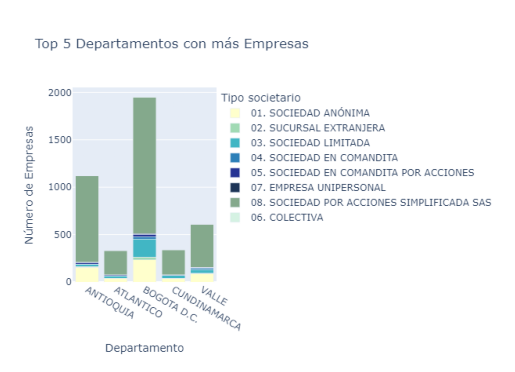

In [ ]:
empresa_counts = data.groupby(["Departamento", "Tipo societario"]).size().reset_index(name="Cantidad de Empresas")
top_departments = data["Departamento"].value_counts().head(5).index
filtered_data = empresa_counts[empresa_counts["Departamento"].isin(top_departments)]
custom_colors = ['#ffffcc', '#a1dab4', '#41b6c4', '#2c7fb8', '#253494','#1d3557','#84a98c','#d5f2e3']
fig = px.bar(
    filtered_data,
    x="Departamento",
    y="Cantidad de Empresas",
    color="Tipo societario",
    barmode="stack",
    title="Top 5 Departamentos con más Empresas",
    labels={"Departamento": "Departamento", "Cantidad de Empresas": "Número de Empresas", "Estado actual": "Estado"},
    color_discrete_sequence=custom_colors  # Aplicar la gama de colores
)

# Ajustar diseño
fig.update_layout(
    yaxis=dict(title="Número de Empresas"),
    xaxis=dict(title="Departamento"),
    legend_title_text="Tipo societario"
)

# Mostrar la gráfica
fig.show()

La visualización presentada identifica los departamentos con mayor concentración empresarial, destacando Bogotá D.C., Valle, y Antioquia como los principales. Además, se observa una distribución por tipo societario, donde predominan las Sociedades por Acciones Simplificadas (SAS). Esta tendencia refuerza el papel de estos departamentos como centros económicos clave en el país.

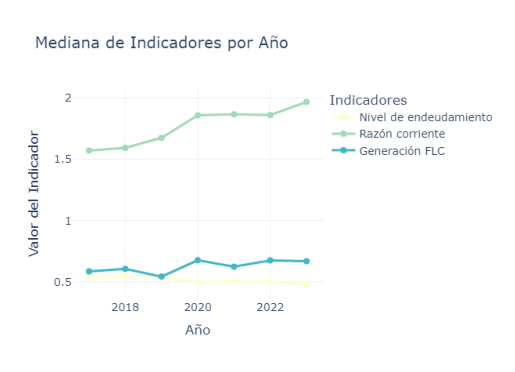

In [ ]:
median_values = data.groupby("Fecha de Corte")[['Nivel de endeudamiento', 'Razón corriente', 'Generación FLC']].median()

fig = go.Figure()

colors = ['#ffffcc', '#a1dab4', '#41b6c4', '#2c7fb8', '#253494']

for i, column in enumerate(median_values.columns):
    fig.add_trace(go.Scatter(
        x=median_values.index,
        y=median_values[column],
        mode='lines+markers',
        name=column,
        line=dict(color=colors[i % len(colors)], width=3),  # Ciclo de colores
        marker=dict(size=8)  # Tamaño de los marcadores
    ))

fig.update_layout(
    title="Mediana de Indicadores por Año",
    xaxis_title="Año",
    yaxis_title="Valor del Indicador",
    legend_title="Indicadores",
    template="plotly_white",
    font=dict(size=14),
    title_font=dict(size=20)
)

fig.show()


La gráfica de evolución de la mediana de los indicadores financieros entre 2018 y 2022 destaca tendencias clave. La razón corriente muestra un crecimiento sostenido, reflejando una mejora en la capacidad de las empresas para cubrir obligaciones a corto plazo. Por otro lado, la generación de FLC se mantiene estable, mientras que el nivel de endeudamiento muestra ligeras variaciones pero permanece controlado. Estos resultados sugieren que las empresas están fortaleciendo su estabilidad financiera, particularmente en términos de liquidez, mientras mantienen una estrategia conservadora respecto al endeudamiento.

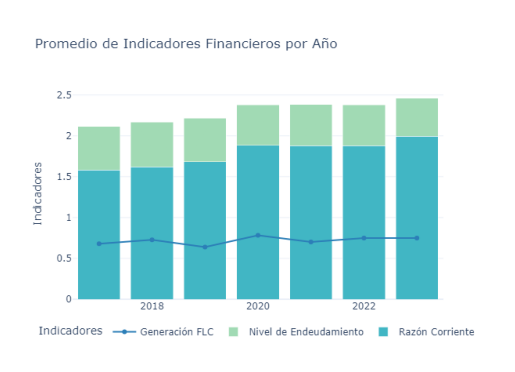

In [ ]:
data_agg = data.groupby("Fecha de Corte").median(numeric_only=True).reset_index()

# Crear el gráfico de barras apiladas y línea
fig = go.Figure()

# Agregar las barras apiladas para "Razón Corriente" y "Nivel de Endeudamiento"
fig.add_trace(go.Bar(
    x=data_agg["Fecha de Corte"],
    y=data_agg["Razón corriente"],
    name="Razón Corriente",
    marker_color="#41b6c4"
))

fig.add_trace(go.Bar(
    x=data_agg["Fecha de Corte"],
    y=data_agg["Nivel de endeudamiento"],
    name="Nivel de Endeudamiento",
    marker_color="#a1dab4"
))

# Agregar la línea para "ROA"
fig.add_trace(go.Scatter(
    x=data_agg["Fecha de Corte"],
    y=data_agg["Generación FLC"],
    name="Generación FLC",
    mode="lines+markers",
    line=dict(color="#2c7fb8", width=2)
))

# Ajustar el diseño del gráfico
fig.update_layout(
    title="Promedio de Indicadores Financieros por Año",
    yaxis=dict(title=" Indicadores"),
    barmode="stack",  # Apilar las barras
    legend=dict(title="Indicadores", orientation="h", x=0.5, xanchor="center"),
    template="plotly_white"
)

fig.show()


Muestra el promedio de indicadores financieros por año, destacando la evolución de la razón corriente, el nivel de endeudamiento y la generación de FLC entre 2018 y 2022. Se observa que la razón corriente presenta un incremento gradual, alcanzando los valores más altos en 2022, lo que indica una mejora en la capacidad de las empresas para cumplir con sus obligaciones a corto plazo. El nivel de endeudamiento se mantiene relativamente estable, mientras que la generación de FLC registra ligeras fluctuaciones, pero con valores consistentes a lo largo del período. Esto sugiere un panorama financiero estable, con tendencias hacia un fortalecimiento en la liquidez de las empresas.

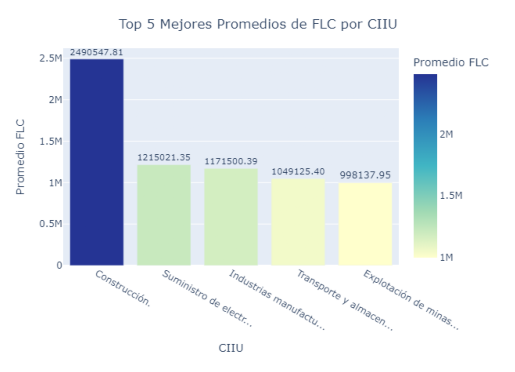

In [ ]:
data['CIIU_abreviado'] = data[' CIIU'].apply(lambda x: x[:20] + '...' if len(x) > 20 else x)

top_ciiu = data.groupby([' CIIU', 'CIIU_abreviado'])['FLC'].mean().nlargest(5).reset_index()

fig = px.bar(
    top_ciiu,
    x='CIIU_abreviado',
    y='FLC',
    title='Top 5 Mejores Promedios de FLC por CIIU',
    labels={'CIIU_abreviado': 'CIIU', 'FLC': 'Promedio FLC'},
    text='FLC',
    color='FLC',
    color_continuous_scale=['#ffffcc', '#a1dab4', '#41b6c4', '#2c7fb8', '#253494']
)


fig.update_layout(
    yaxis_title='Promedio FLC',
    xaxis_title=' CIIU',
    title_x=0.5,  # Centrar el título
    margin=dict(t=50, b=50, l=50, r=50)
)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

fig.show()


Resalta los sectores económicos con los mayores promedios de generación de flujo de caja libre (FLC) según el código CIIU. El sector de Construcción lidera significativamente con un promedio de 2,490,547.81, seguido por el suministro de electricidad, industrias manufactureras, transporte y almacenamiento, y la explotación de minas. La notable superioridad del sector de construcción en comparación con los demás sectores evidencia su papel clave en la generación de recursos económicos, lo que podría estar influenciado por su alta actividad y capacidad de inversión en proyectos de gran escala.

## Indicador de Liquidez

In [257]:
data.describe()

,NIT,años,Fecha de Corte,Total de activos,Total pasivos,Razón corriente,Rotación inventario producto terminado,Rotación cartera,Rotación proveedores,Productividad KTNO,...,Generación Efectivo,FLC,FDC/FLC,SD,FDC,Generación FLC,Tasa de Desempleo,Tasa de Ocupación,PIB,PIB DEP
count,3.716800e+04,37149.000000,37168.000000,3.716800e+04,3.716800e+04,37111.000000,3.186000e+04,3.657600e+04,3.186000e+04,3.657600e+04,...,37134.000000,3.716800e+04,3.716800e+04,3.716800e+04,3.716800e+04,3.713400e+04,36860.000000,34999.000000,37166.000000,37168.000000
mean,8.615892e+08,20.959757,2020.233104,2.042835e+07,1.046342e+07,13.206521,1.412693e+05,7.796766e+04,4.840119e+04,3.866049e+02,...,-4.833936,8.384701e+05,8.990537e+01,2.326276e+06,-1.487806e+06,-1.639426e+02,11.867251,182.285990,33416.825636,153486.700373
std,4.162978e+07,13.400888,1.945530,6.171417e+07,3.142624e+07,572.177050,2.401427e+07,9.339886e+06,6.611296e+06,7.106724e+04,...,1071.508247,3.783133e+07,1.712816e+04,3.850221e+07,1.226777e+07,3.261733e+04,3.584255,141.828038,33326.021729,101519.189765
min,8.000001e+08,0.000000,2017.000000,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-2.355509e+06,...,-198573.000000,-4.400879e+08,-1.619655e+04,1.000000e+00,-1.106243e+09,-6.281511e+06,3.209824,0.092000,13.451994,3652.635931
25%,8.160054e+08,11.000000,2019.000000,5.004917e+06,1.938962e+06,1.184353,6.403842e+00,3.348147e+01,3.284450e+01,4.849845e-02,...,-0.374026,-1.527482e+05,-2.376686e-02,9.599925e+04,-9.651652e+05,-5.036626e-01,8.754869,63.975444,8425.354585,56332.703361
50%,8.903174e+08,18.000000,2020.000000,9.833846e+06,4.445236e+06,1.777251,4.920544e+01,7.249947e+01,7.033965e+01,2.005705e-01,...,0.032847,2.123890e+05,7.045683e-01,3.553455e+05,-8.987550e+04,6.332252e-01,11.343576,159.313000,20388.204806,136416.998770
75%,9.003307e+08,29.000000,2022.000000,2.077525e+07,1.017146e+07,3.090929,1.405351e+02,1.421883e+02,1.384732e+02,4.964277e-01,...,0.585943,9.754378e+05,1.147391e+00,1.233916e+06,2.089495e+05,2.058118e+00,13.234388,251.646675,50933.867785,233872.353566
max,9.016262e+08,320.000000,2023.000000,6.494168e+09,2.932200e+09,82139.323952,4.283006e+09,1.613495e+09,1.132792e+09,1.322767e+07,...,52292.389140,5.830583e+09,3.301999e+06,5.901266e+09,2.553629e+08,1.969302e+05,23.242521,584.526000,124683.823762,345847.243838


Esta tabla es fundamental, ya que permite centralizar los datos dentro del rango en el que se concentra la mayor parte de la información. Dado que algunas variables presentan valores atípicos, las distribuciones en los histogramas no se aprecian claramente. Aunque estos valores atípicos no serán eliminados del análisis o del proceso del modelo, enfocaremos la visualización únicamente en el rango central para facilitar la interpretación de las distribuciones principales. 

In [ ]:
import pickle

variables = [
    'Razón corriente', 'Rotación inventario producto terminado',
    'Rotación cartera', 'Rotación proveedores', 'Productividad KTNO', 'ROA',
    'ROE', 'Nivel de endeudamiento', 'Generación Efectivo',
    'SD', 'Generación FLC'
]

for variable in variables:
    summary = data.groupby("Fecha de Corte")[variable].describe()[["count", "mean", "std", "min", "25%", "50%", "75%", "max"]]
    
    # Definir el nombre del archivo Pickle
    file_name = f"summary_{variable.replace(' ', '_').lower()}.pkl"

    with open(file_name, "wb") as f:
        pickle.dump(summary, f)
    
    print(f"Tabla de resumen para '{variable}' guardada como '{file_name}'")


Tabla de resumen para 'Razón corriente' guardada como 'summary_razón_corriente.pkl'
Tabla de resumen para 'Rotación inventario producto terminado' guardada como 'summary_rotación_inventario_producto_terminado.pkl'
Tabla de resumen para 'Rotación cartera' guardada como 'summary_rotación_cartera.pkl'
Tabla de resumen para 'Rotación proveedores' guardada como 'summary_rotación_proveedores.pkl'
Tabla de resumen para 'Productividad KTNO' guardada como 'summary_productividad_ktno.pkl'
Tabla de resumen para 'ROA' guardada como 'summary_roa.pkl'
Tabla de resumen para 'ROE' guardada como 'summary_roe.pkl'
Tabla de resumen para 'Nivel de endeudamiento' guardada como 'summary_nivel_de_endeudamiento.pkl'
Tabla de resumen para 'Generación Efectivo' guardada como 'summary_generación_efectivo.pkl'
Tabla de resumen para 'SD' guardada como 'summary_sd.pkl'
Tabla de resumen para 'Generación FLC' guardada como 'summary_generación_flc.pkl'


### Razón Corriente

La razón corriente es un indicador financiero que mide la capacidad de una empresa para cubrir sus obligaciones a corto plazo. Es crucial porque refleja la liquidez de la empresa; una razón corriente adecuada indica que la empresa puede afrontar sus deudas a corto plazo, mientras que valores muy bajos pueden señalar problemas financieros, y valores excesivamente altos podrían sugerir ineficiencia en el uso de recursos.

In [7]:
with open("summary_razón_corriente.pkl", "rb") as f:
    fig = pickle.load(f)

fig

,count,mean,std,min,25%,50%,75%,max
Fecha de Corte,,,,,,,,
2017,4352.0,7.303693,159.713422,0.003313,1.092265,1.569790,2.622994,9999.579670
2018,4072.0,24.885155,1287.723621,0.000000,1.105998,1.593450,2.677911,82139.323952
2019,5271.0,8.237943,117.732576,0.000000,1.126527,1.674568,2.796945,4675.211259
2020,5829.0,7.080751,52.571099,0.000000,1.220610,1.858685,3.334426,2340.499261
2021,5880.0,16.126973,460.260075,0.000927,1.231469,1.866510,3.290440,33976.214286
2022,5899.0,20.747067,810.198275,0.000000,1.229012,1.860095,3.258336,61788.666667
2023,5808.0,9.483427,117.383357,0.000607,1.273717,1.967164,3.456371,7103.963684


La tabla presenta un resumen estadístico anual de los datos entre 2017 y 2023, mostrando fluctuaciones significativas en el promedio y la variabilidad de los datos. Los valores promedio oscilan desde 7.08 en 2020 hasta un máximo de 24.88 en 2018, influenciados por valores atípicos extremos como los máximos de 82,139.32 en 2018 y 61,788.67 en 2022. A pesar de esta alta dispersión, evidenciada por desviaciones estándar elevadas en algunos años, los percentiles (25%, 50%, y 75%) permanecen relativamente estables, con medianas cercanas a 1.5 y 3.3 en todo el periodo. Esto sugiere que la mayoría de los datos se concentran en un rango central definido, mientras que los valores atípicos representan casos extremos que afectan las métricas globales.

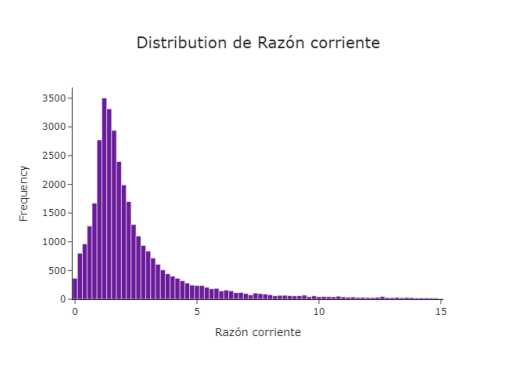

In [ ]:
fig = px.histogram(
    data,
    x="Razón corriente",
    nbins=100,  
    title="Distribution de Razón corriente",
    template="simple_white",
    color_discrete_sequence=["#6a1b9a"]
)
fig.update_layout(
    xaxis_title="Razón corriente",
    yaxis_title="Frequency",
    title_font=dict(size=20),
    title_x=0.5  
)

with open("histograma_razón_corriente.pkl", "wb") as f:
    pickle.dump(fig, f)

fig.write_html("histograma_razón_corriente.html")

fig.show()


La distribución de la razón corriente muestra una marcada asimetría positiva, con la mayoría de los valores concentrados entre 0 y 3. Este comportamiento indica que la mayoría de las empresas tienen niveles razonables de liquidez para cubrir sus obligaciones a corto plazo, mientras que hay una menor frecuencia de valores más altos. 

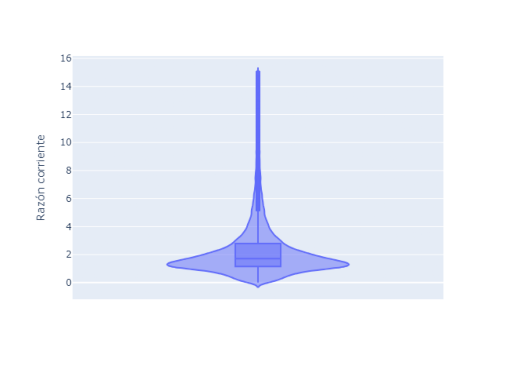

In [ ]:
fig = px.violin(data, y='Razón corriente', box=True)
with open("violin_razón_corriente.pkl", "wb") as f:
    pickle.dump(fig, f)
fig.show()

El gráfico de violín proporciona una visualización más detallada de la dispersión y la densidad de los valores de la razón corriente. La distribución central muestra una fuerte concentración alrededor de la mediana, con un rango intercuartil que refleja estabilidad en la mayoría de los datos. Sin embargo, la presencia de colas alargadas hacia valores más altos evidencia la existencia de valores atípicos, lo que refuerza la asimetría identificada en el histograma y la necesidad de análisis focalizados en las distribuciones centrales.

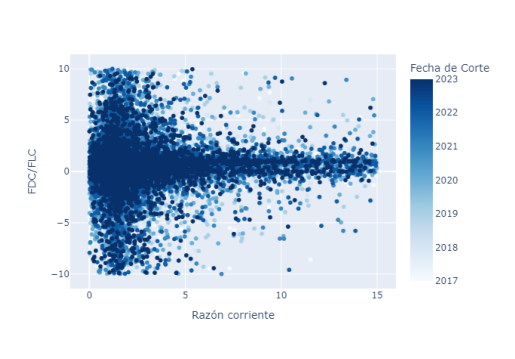

In [ ]:

fig = px.scatter(data, x='Razón corriente', y="FDC/FLC", color="Fecha de Corte",color_continuous_scale='Blues')
fig.show()


El gráfico de dispersión ilustra la relación entre la razón corriente y el FDC/FLC, segmentada por años. Se observa que, aunque la mayoría de los puntos se concentran en niveles bajos de razón corriente y valores cercanos a cero de FDC/FLC, hay una mayor dispersión a medida que aumentan los niveles de liquidez. Esto sugiere que empresas con mayor liquidez presentan mayor variabilidad en su generación de flujos de caja, lo que podría estar relacionado con dinámicas operativas o estrategias financieras específicas. La segmentación por años muestra consistencia en este comportamiento a lo largo del tiempo.

### Rotación de cartera

La rotación de cartera es un indicador financiero que mide la eficiencia con la que una empresa gestiona y recupera sus cuentas por cobrar, calculándose como ventas a crédito divididas entre el promedio de cuentas por cobrar. Es importante porque una alta rotación indica que la empresa cobra rápidamente a sus clientes, mejorando su flujo de caja, mientras que una rotación baja puede señalar problemas en la gestión de cobros o políticas de crédito poco eficientes.

In [9]:
with open("summary_rotación_cartera.pkl", "rb") as f:
    fig = pickle.load(f)

fig

,count,mean,std,min,25%,50%,75%,max
Fecha de Corte,,,,,,,,
2017,4291.0,376669.066426,2.463135e+07,0.0,35.753840,75.002419,137.351741,1.613495e+09
2018,4008.0,948.109519,3.567057e+04,0.0,35.031390,74.713429,144.319720,2.240510e+06
2019,5197.0,890.700175,2.164373e+04,0.0,34.122229,72.528431,135.217081,1.292905e+06
2020,5751.0,895.370484,2.069297e+04,0.0,37.280422,79.614244,164.349208,1.386330e+06
2021,5788.0,11598.777485,6.652431e+05,0.0,32.929559,74.056065,148.816561,4.927356e+07
2022,5811.0,198024.820961,1.003110e+07,0.0,31.187030,68.661895,140.457714,6.663798e+08
2023,5730.0,702.233646,1.648406e+04,0.0,30.655188,65.700124,130.998899,1.141807e+06


La tabla presenta un análisis estadístico de un indicador financiero clave para las empresas en el período comprendido entre 2017 y 2023. El promedio de los valores muestra fluctuaciones notables a lo largo de los años, con picos significativos en 2017 y 2021 debido a la presencia de valores máximos extraordinarios (1.61e+09 en 2017 y 4.92e+07 en 2021). La mediana y los percentiles (25% y 75%) permanecen relativamente estables, indicando que la mayor parte de las empresas se concentran en un rango definido, aunque valores atípicos generan una alta dispersión reflejada en la desviación estándar. 

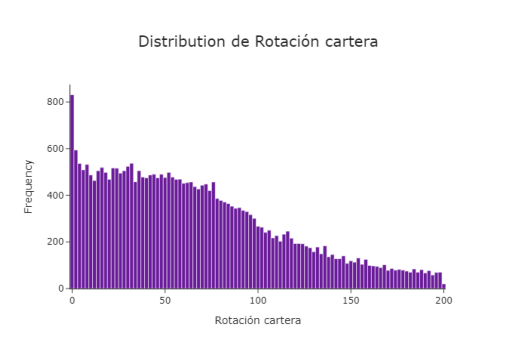

In [ ]:

fig = px.histogram(
    data,
    x='Rotación cartera',
    nbins=100,  
    title="Distribution de Rotación cartera",
    template="simple_white",
    color_discrete_sequence=["#6a1b9a"]
)

fig.update_layout(
    xaxis_title='Rotación cartera',
    yaxis_title="Frequency",
    title_font=dict(size=20),
    title_x=0.5  # Centrar el título
)

with open("histograma_rotación_cartera.pkl", "wb") as f:
    pickle.dump(fig, f)

fig.write_html("histograma_rotación_cartera.html")
fig.show()

La distribución presenta una asimetría positiva, con la mayor frecuencia de valores concentrada cerca de cero y una disminución progresiva hacia valores más altos. Esto indica que la mayoría de las empresas tienen una rotación de cartera baja o moderada, lo que sugiere tiempos relativamente cortos para recuperar las cuentas por cobrar. Sin embargo, la cola alargada hacia valores más altos refleja la existencia de empresas con políticas de cobro más agresivas o con altos niveles de eficiencia en la recuperación de cartera.

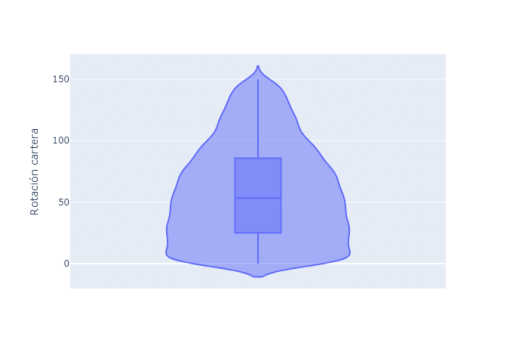

In [ ]:
fig = px.violin(data, y='Rotación cartera', box=True)
with open("violin_rotación_cartera.pkl", "wb") as f:
    pickle.dump(fig, f)
fig.show()


Muestra una concentración significativa de los datos alrededor de la mediana, mientras que los extremos reflejan valores más dispersos. La amplitud del rango intercuartil sugiere una variabilidad moderada en la rotación de cartera, con una densidad que disminuye hacia los valores más altos. Este comportamiento reafirma que la mayoría de las empresas operan dentro de un rango de rotación moderado, mientras que un número reducido alcanza valores extremos.

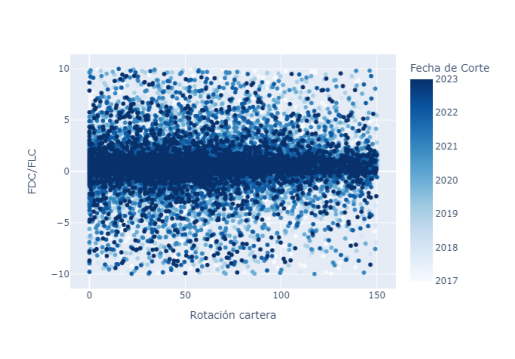

In [ ]:

fig = px.scatter(data, x='Razón corriente', y="FDC/FLC", color="Fecha de Corte",color_continuous_scale='Blues')

fig.show()

La relación entre la rotación de cartera y el FDC/FLC, segmentada por año. Se observa una distribución uniforme en el eje vertical, lo que sugiere que no existe una correlación directa evidente entre la rotación de cartera y la generación de flujo de caja libre. La densidad de puntos en el rango de rotación baja y moderada refuerza que la mayoría de las empresas operan en estos niveles, sin grandes fluctuaciones en su flujo de caja independiente del año de análisis.

### Rotación inventario producto terminado

La rotación de inventario de producto terminado mide cuántas veces una empresa vende y reemplaza su inventario de productos terminados en un período determinado, calculándose como costo de ventas dividido entre inventario promedio. Es crucial para evaluar la eficiencia operativa; una alta rotación indica una buena gestión del inventario y rápida venta de productos, mientras que una rotación baja puede señalar problemas de ventas, exceso de inventario o ineficiencia en la producción.

In [8]:
with open("summary_rotación_inventario_producto_terminado.pkl", "rb") as f:
    fig = pickle.load(f)

fig

,count,mean,std,min,25%,50%,75%,max
Fecha de Corte,,,,,,,,
2017,3734.0,1.147617e+06,7.009088e+07,0.0,8.325483,53.856988,139.384080,4.283006e+09
2018,3499.0,4.858337e+04,2.844405e+06,0.0,9.498461,54.521920,148.752598,1.682532e+08
2019,4559.0,7.367679e+02,2.270826e+04,0.0,6.517747,49.806225,140.036256,1.492098e+06
2020,5018.0,5.940971e+03,3.921041e+05,0.0,5.776894,50.804060,151.640717,2.777451e+07
2021,5059.0,1.244830e+03,4.742500e+04,0.0,5.830003,48.428257,146.912353,3.208112e+06
2022,5008.0,3.906520e+02,5.596787e+03,0.0,4.817802,45.892201,135.110197,3.034929e+05
2023,4983.0,8.469576e+02,2.675146e+04,0.0,6.070416,44.799548,125.974998,1.464790e+06


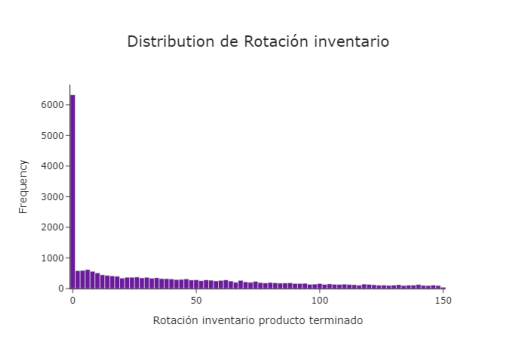

In [ ]:
fig = px.histogram(
    data,
    x='Rotación inventario producto terminado',
    nbins=100,  
    title="Distribution de Rotación inventario",
    template="simple_white",
    color_discrete_sequence=["#6a1b9a"]
)

# Ajustar las etiquetas
fig.update_layout(
    xaxis_title='Rotación inventario producto terminado',
    yaxis_title="Frequency",
    title_font=dict(size=20),
    title_x=0.5  # Centrar el título
)

# Guardar la figura como un archivo Pickle
with open("histograma_rotación_inventario_producto_terminado.pkl", "wb") as f:
    pickle.dump(fig, f)

# O para guardar como HTML si prefieres visualización directa
fig.write_html("histograma_rotación_inventario_producto_terminado.html")

# Mostrar el gráfico
fig.show()


Presenta una fuerte asimetría positiva, con una alta concentración de valores cerca de cero y una disminución progresiva hacia valores más altos. Esto indica que la mayoría de las empresas tienen una rotación de inventarios baja o moderada, lo que puede reflejar procesos de venta estables o un manejo conservador de los inventarios. 

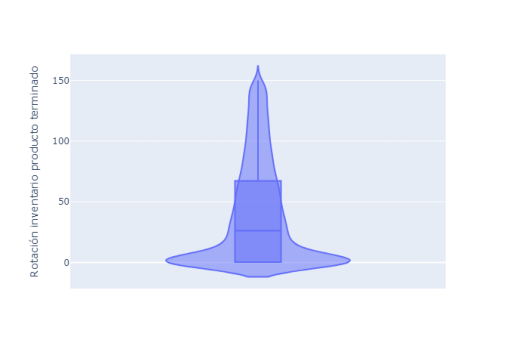

In [ ]:
pickle_file = "violin_rotación_inventario_producto_terminado.pkl"  # Reemplaza con el nombre o ruta de tu archivo
with open(pickle_file, "rb") as f:
    fig = pickle.load(f)

fig.show()

La mayoría de los datos están concentrados cerca de la mediana, con un rango intercuartil que indica una variabilidad moderada. Las colas del gráfico muestran la presencia de valores extremos, lo que refuerza la idea de que existen algunas empresas con rotaciones de inventario inusualmente altas. 

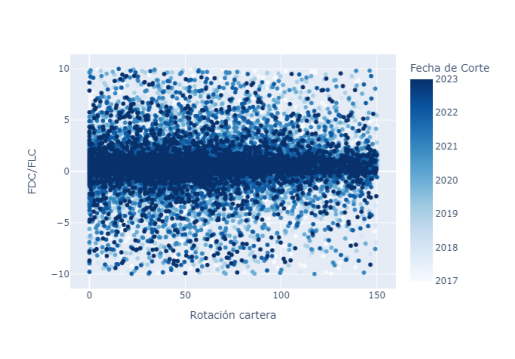

In [ ]:

pickle_file = "correlacion_rotación_cartera.pkl"  # Reemplaza con el nombre o ruta de tu archivo
with open(pickle_file, "rb") as f:
    fig = pickle.load(f)

fig.show()

El gráfico de dispersión ilustra la relación entre la rotación de inventario y el FDC/FLC, segmentada por año. No se observa una correlación clara entre estas dos variables, ya que los puntos están distribuidos de manera uniforme en el eje vertical. Esto sugiere que la rotación de inventario no tiene un impacto directo o consistente en la generación de flujos de caja libres, aunque la mayoría de los puntos se concentran en niveles bajos y moderados de rotación, lo que refuerza su predominancia en las operaciones empresariales.

### Productividad KTNO

La rotación de inventario de producto terminado mide cuántas veces una empresa vende y reemplaza su inventario de productos terminados en un período determinado, calculándose como costo de ventas dividido entre inventario promedio. Es crucial para evaluar la eficiencia operativa; una alta rotación indica una buena gestión del inventario y rápida venta de productos, mientras que una rotación baja puede señalar problemas de ventas, exceso de inventario o ineficiencia en la producción.

In [23]:
with open("summary_productividad_ktno.pkl", "rb") as f:
    fig = pickle.load(f)

fig

,count,mean,std,min,25%,50%,75%,max
Fecha de Corte,,,,,,,,
2017,4291.0,3083.873308,201931.563349,-2.589974e+03,0.026382,0.163053,0.415936,1.322767e+07
2018,4008.0,1.363764,30.887149,-8.592915e+02,0.030173,0.171598,0.459569,1.211335e+03
2019,5197.0,-4.571883,473.232152,-3.388600e+04,0.034209,0.178309,0.440001,3.653443e+03
2020,5751.0,0.832594,121.290470,-7.077806e+03,0.060736,0.243201,0.589472,4.626492e+03
2021,5788.0,-401.381783,30961.971393,-2.355509e+06,0.061023,0.221076,0.545095,1.038485e+04
2022,5811.0,553.828768,26906.984778,-2.787106e+02,0.059210,0.205856,0.509483,1.706343e+06
2023,5730.0,4.531586,97.571464,-1.728386e+02,0.062574,0.211956,0.498341,4.725112e+03


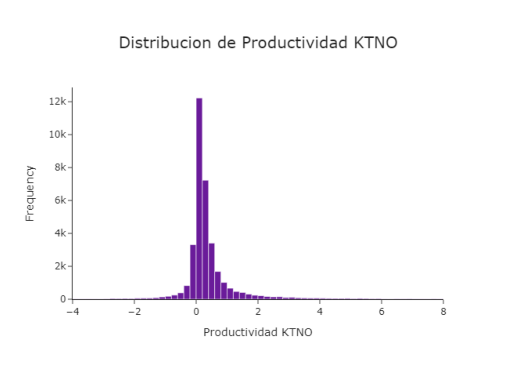

In [ ]:
fig = px.histogram(
    data,
    x='Productividad KTNO',
    nbins=100,  
    title="Distribucion de Productividad KTNO",
    template="simple_white",
    color_discrete_sequence=["#6a1b9a"]
)

fig.update_layout(
    xaxis_title='Productividad KTNO',
    yaxis_title="Frequency",
    title_font=dict(size=20),
    title_x=0.5  
)

with open("histograma_productividad_ktno.pkl", "wb") as f:
    pickle.dump(fig, f)

fig.write_html("histograma_productividad_ktno.html")

fig.show()

La distribución de la productividad KTNO muestra una forma aproximadamente normal, con una alta concentración de valores cerca de 0 y una disminución progresiva hacia valores positivos y negativos extremos. Esto sugiere que la mayoría de las empresas tienen niveles de productividad operativa cercanos al promedio.

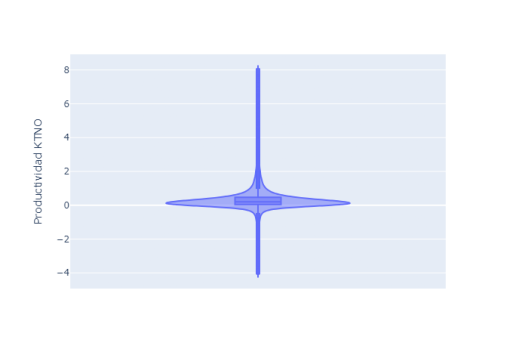

In [ ]:
fig = px.violin(data, y='Productividad KTNO', box=True)
with open("violin_productividad_ktno.pkl", "wb") as f:
    pickle.dump(fig, f)
fig.show()

La mayor densidad de datos está concentrada alrededor del valor promedio, con un rango intercuartil estrecho, lo que indica que la mayoría de las empresas tienen niveles de productividad similares. Sin embargo, las colas extendidas hacia valores extremos reflejan la presencia de algunas empresas con productividad muy alta o muy baja, destacando la variabilidad en los resultados operativos.

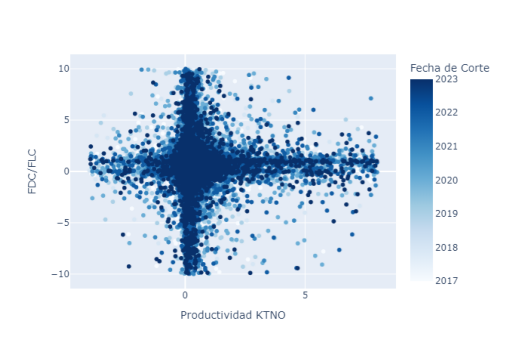

In [ ]:
fig = px.scatter(data, x='Productividad KTNO', y="FDC/FLC", color="Fecha de Corte",color_continuous_scale='Blues')
with open("correlacion_productividad_ktno.pkl", "wb") as f:
    pickle.dump(fig, f)
fig.write_html("correlacion_productividad_ktno.html")

fig.show()


Aunque no se observa una correlación directa entre ambas variables, la distribución sugiere que la productividad KTNO influye de manera diversa en la generación de flujos de caja libre, dependiendo de las condiciones operativas de las empresas. La concentración de puntos alrededor de valores bajos de productividad refuerza su predominancia, mientras que los valores extremos destacan casos atípicos con un posible impacto financiero significativo.

### Rotación proveedores

La rotación de proveedores mide cuántas veces una empresa paga a sus proveedores en un período determinado, calculándose como el costo de ventas dividido entre las cuentas por pagar promedio. Es importante porque refleja la eficiencia en la gestión de pagos; una alta rotación indica pagos rápidos, lo que puede fortalecer relaciones con proveedores, mientras que una rotación baja sugiere demoras en los pagos, lo que podría afectar la credibilidad y acceso a crédito comercial.

In [33]:
with open("summary_rotación_proveedores.pkl", "rb") as f:
    fig = pickle.load(f)

fig

,count,mean,std,min,25%,50%,75%,max
Fecha de Corte,,,,,,,,
2017,3734.0,304350.410942,1.853799e+07,0.0,37.396673,76.628063,146.350676,1.132792e+09
2018,3499.0,94711.945801,5.564837e+06,0.0,38.912153,77.037363,147.521291,3.291736e+08
2019,4559.0,7418.973625,4.447150e+05,0.0,34.797499,72.549394,142.207133,3.001558e+07
2020,5018.0,1125.033180,2.678356e+04,0.0,33.956186,71.780047,147.315093,1.774860e+06
2021,5059.0,3900.892093,1.392593e+05,0.0,31.682440,71.655970,139.120017,8.621272e+06
2022,5008.0,1343.623856,3.639215e+04,0.0,30.344887,67.934469,134.264851,2.376360e+06
2023,4983.0,1663.349318,6.867139e+04,0.0,28.031785,59.232440,117.034939,4.780826e+06


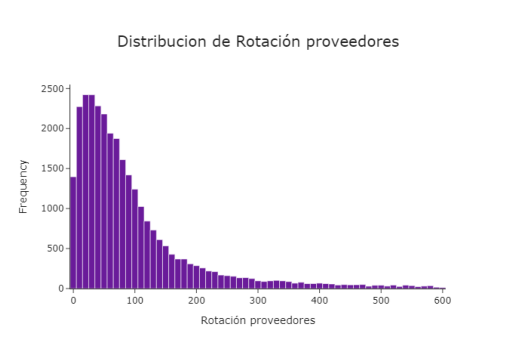

In [ ]:
fig = px.histogram(
    data,
    x='Rotación proveedores',
    nbins=100,  
    title="Distribucion de Rotación proveedores",
    template="simple_white",
    color_discrete_sequence=["#6a1b9a"]
)

fig.update_layout(
    xaxis_title='Rotación proveedores',
    yaxis_title="Frequency",
    title_font=dict(size=20),
    title_x=0.5  
)

fig.show()

La distribución de la rotación de proveedores muestra una fuerte asimetría positiva, con la mayoría de las empresas concentradas en valores bajos, por debajo de 100. Esto indica que gran parte de las empresas realiza pagos a sus proveedores con relativa lentitud o en plazos moderados. Sin embargo, la presencia de una cola extendida hacia valores altos, que alcanzan hasta 600, refleja que un pequeño grupo de empresas realiza pagos con mayor frecuencia, posiblemente debido a prácticas de gestión de proveedores más ágiles o a sectores con ciclos de pagos más cortos.

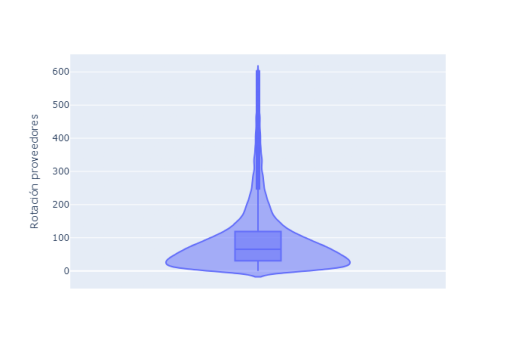

In [ ]:
with open("violin_rotación_proveedores.pkl", "rb") as f:
    fig = pickle.load(f)

fig

El gráfico de violín ofrece una representación detallada de la dispersión de la rotación de proveedores, con una alta concentración de datos cerca de la mediana y un rango intercuartil relativamente estrecho. Las colas largas en la distribución reflejan la presencia de valores extremos, lo que sugiere variaciones significativas en las prácticas de pago entre empresas. La forma del gráfico resalta que, aunque la mayoría opera en un rango definido, hay empresas con políticas de pago significativamente más rápidas o más frecuentes.

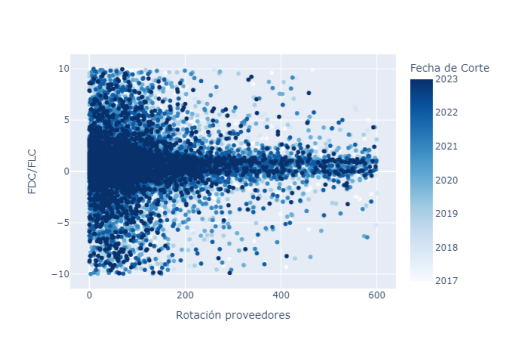

In [ ]:
with open("correlacion_rotación_proveedores.pkl", "rb") as f:
    fig = pickle.load(f)

fig

El gráfico de dispersión ilustra la relación entre la rotación de proveedores y el FDC/FLC, segmentada por año. No se identifica una correlación clara entre ambas variables, ya que los puntos están distribuidos uniformemente en el eje vertical. Sin embargo, se observa una mayor densidad en niveles bajos de rotación de proveedores, lo que refuerza la predominancia de estas prácticas en la mayoría de las empresas. Los valores extremos en la rotación parecen no tener un impacto significativo en el flujo de caja libre, reflejando dinámicas independientes en su gestión operativa.

## Indicador de Rentabilidad

### ROA

El **ROA (Return on Assets)** mide la rentabilidad de una empresa en relación con sus activos totales, calculándose como utilidad neta dividida entre activos totales. Es crucial porque refleja qué tan eficientemente una empresa utiliza sus activos para generar ganancias; un ROA alto indica un uso eficiente de los recursos, mientras que un ROA bajo puede señalar ineficiencia o inversiones poco rentables.

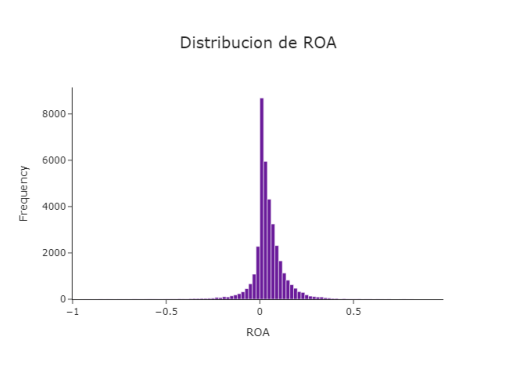

In [ ]:
fig = px.histogram(
    data,
    x='ROA',
    nbins=100,  
    title="Distribucion de ROA",
    template="simple_white",
    color_discrete_sequence=["#6a1b9a"]
)

fig.update_layout(
    xaxis_title='ROA',
    yaxis_title="Frequency",
    title_font=dict(size=20),
    title_x=0.5  
)


fig.show()

La distribución muestra una forma aproximadamente normal, con una alta concentración de valores cercanos a cero y una disminución hacia los extremos positivos y negativos. Esto sugiere que la mayoría de las empresas tienen un rendimiento moderado en relación con sus activos, mientras que los valores extremos reflejan casos de alta rentabilidad o ineficiencia significativa. La simetría relativa alrededor de cero indica que tanto rendimientos positivos como negativos son comunes, aunque en menor proporción.

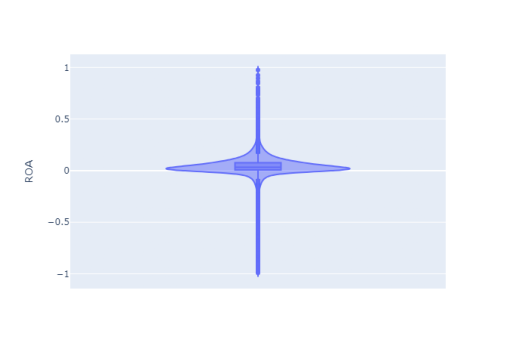

In [ ]:
with open("violin_roa.pkl", "rb") as f:
    fig = pickle.load(f)

fig

La concentración de valores cerca de la mediana, con un rango intercuartil relativamente estrecho, lo que indica que la mayoría de las empresas operan con niveles similares de rentabilidad de activos. Las colas largas hacia los extremos positivos y negativos destacan la presencia de valores atípicos, que reflejan empresas con resultados financieros excepcionales, ya sea por eficiencia operativa o dificultades significativas.

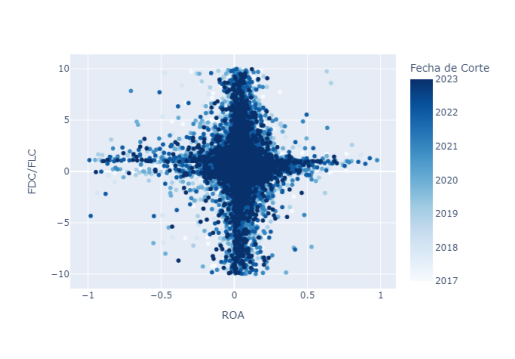

In [ ]:
with open("correlacion_roa_roa.pkl", "rb") as f:
    fig = pickle.load(f)

fig

El ROA y el FDC/FLC, segmentada por año. Aunque no se observa una correlación clara, los puntos muestran una distribución uniforme alrededor del eje central, lo que indica que el rendimiento de los activos no tiene un impacto directo en la generación de flujos de caja libres. La concentración de puntos cercanos a cero en el ROA refuerza su prevalencia como un nivel típico de desempeño empresarial, mientras que los valores extremos destacan casos puntuales de interés.

### ROE

El **ROE (Return on Equity)** mide la rentabilidad de una empresa en relación con el capital de sus accionistas, calculándose como utilidad neta dividida entre patrimonio total. Es clave porque indica qué tan eficientemente una empresa utiliza los recursos de sus accionistas para generar ganancias; un ROE alto refleja una gestión efectiva y atractiva para los inversionistas, mientras que un ROE bajo puede señalar problemas de rentabilidad o uso ineficiente del capital.

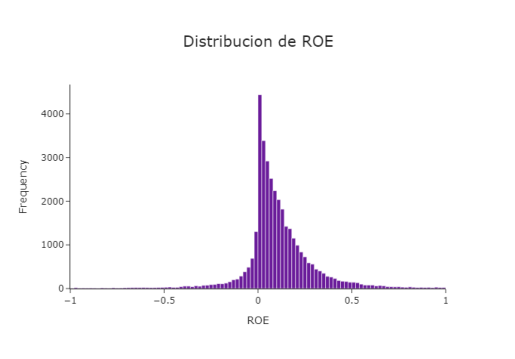

In [ ]:
fig = px.histogram(
    data,
    x='ROE',
    nbins=100,  
    title="Distribucion de ROE",
    template="simple_white",
    color_discrete_sequence=["#6a1b9a"]
)

fig.update_layout(
    xaxis_title='ROE',
    yaxis_title="Frequency",
    title_font=dict(size=20),
    title_x=0.5  
)


fig.show()

La distribución del ROE presenta una forma aproximadamente normal, con la mayor concentración de valores cercanos a cero y una disminución hacia los extremos positivos y negativos. 

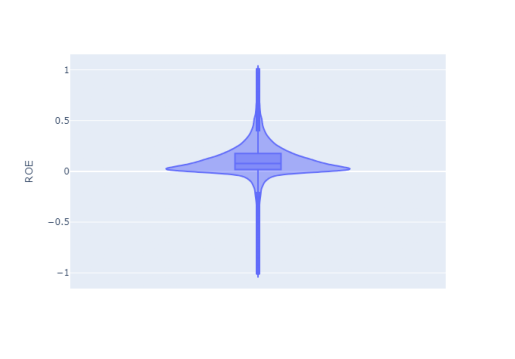

In [ ]:
with open("violin_roe.pkl", "rb") as f:
    fig = pickle.load(f)

fig

 ROE muestra una alta concentración de valores alrededor de la mediana, con un rango intercuartil estrecho que indica consistencia en el desempeño de la mayoría de las empresas. Las colas largas hacia los extremos positivos y negativos reflejan la presencia de valores atípicos que representan empresas con resultados financieros excepcionales.

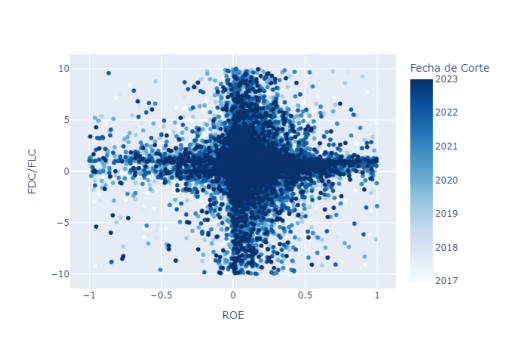

In [ ]:
with open("correlacion_roe.pkl", "rb") as f:
    fig = pickle.load(f)

fig

No se observa una correlación directa entre estas dos variables, ya que los puntos se distribuyen uniformemente alrededor del eje central. La concentración de puntos en niveles bajos de ROE refuerza la prevalencia de resultados moderados en la mayoría de las empresas, mientras que los valores extremos representan casos puntuales con un posible impacto significativo en el flujo de caja libre.

## Indicador de Endeudamiento

### Servicio a la deuda

El servicio de deuda se refiere al monto total que una empresa destina al pago de sus obligaciones financieras, incluyendo intereses y amortización de préstamos en un período determinado. Es crucial porque refleja la capacidad de la empresa para cumplir con sus compromisos financieros sin comprometer su operación.

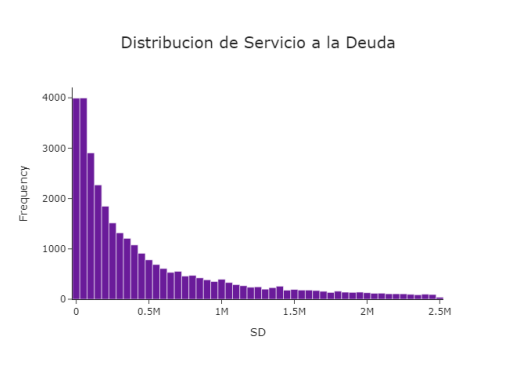

In [ ]:
fig = px.histogram(
    data,
    x='SD',
    nbins=100,  
    title="Distribucion de Servicio a la Deuda",
    template="simple_white",
    color_discrete_sequence=["#6a1b9a"]
)

fig.update_layout(
    xaxis_title='SD',
    yaxis_title="Frequency",
    title_font=dict(size=20),
    title_x=0.5  # Centrar el título
)

fig.show()

Servicio a la deuda muestra una clara asimetría positiva, con una alta concentración de valores cercanos a cero y una disminución progresiva hacia montos más altos. Esto indica que la mayoría de las empresas destinan una porción relativamente pequeña de sus recursos al pago de deudas, mientras que unas pocas empresas tienen compromisos financieros significativamente mayores, lo que puede estar relacionado con sus niveles de apalancamiento o tamaño.

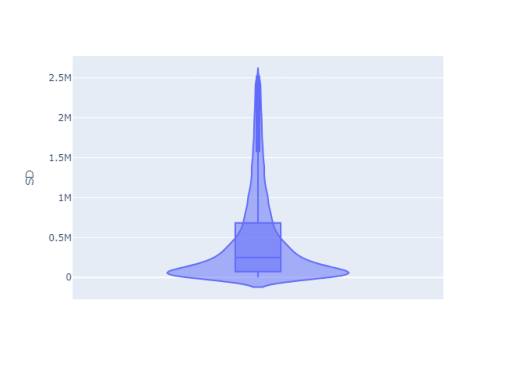

In [ ]:
fig = px.violin(data, y='SD', box=True)
with open("violin_sd.pkl", "wb") as f:
    pickle.dump(fig, f)
fig.show()

Las colas largas hacia valores más altos reflejan la presencia de empresas con obligaciones financieras elevadas, lo que sugiere variaciones significativas entre las políticas de financiamiento de las empresas analizadas. La forma compacta del rango intercuartil indica que, para la mayoría, el servicio a la deuda se encuentra dentro de un rango moderado.

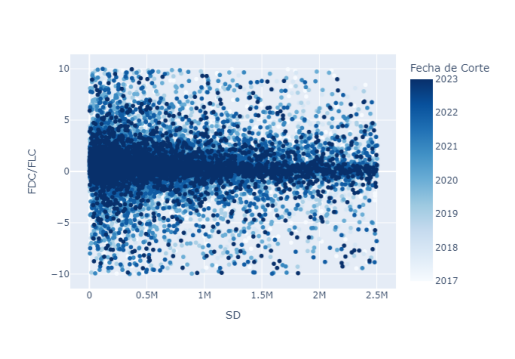

In [ ]:
with open("correlacion_sd.pkl", "rb") as f:
    fig = pickle.load(f)

fig

No se observa una correlación directa, los puntos más densos se encuentran en niveles bajos de SD, lo que refuerza la predominancia de compromisos financieros moderados en la mayoría de las empresas. Los valores más altos de SD no parecen alterar significativamente la generación de flujos de caja libres, sugiriendo que las empresas con mayores deudas pueden estar manejándolas eficientemente.



### Nivel de endeudamiento

El nivel de endeudamiento mide la proporción de deuda en relación con el total de activos de una empresa, calculándose como deuda total dividida entre activos totales. Es un indicador clave para evaluar la solvencia y el riesgo financiero; un nivel alto puede reflejar dependencia de financiamiento externo y mayor riesgo de incumplimiento, mientras que un nivel bajo indica mayor estabilidad financiera y menor exposición al riesgo.

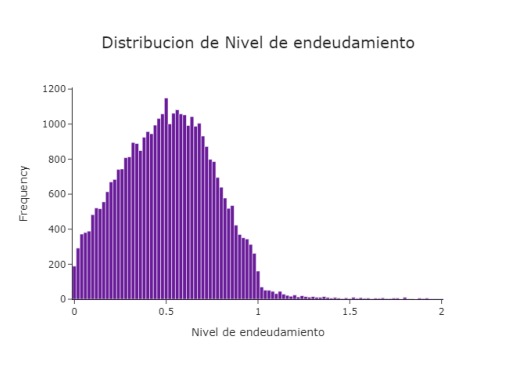

In [ ]:
fig = px.histogram(
    data,
    x='Nivel de endeudamiento',
    nbins=100,  
    title="Distribucion de Nivel de endeudamiento",
    template="simple_white",
    color_discrete_sequence=["#6a1b9a"]
)

fig.update_layout(
    xaxis_title='Nivel de endeudamiento',
    yaxis_title="Frequency",
    title_font=dict(size=20),
    title_x=0.5  # Centrar el título
)

fig.show()

 El nivel de endeudamiento presenta una forma asimétrica hacia la derecha, con un pico alrededor de 0.5, lo que indica que la mayoría de las empresas tienen deudas que representan aproximadamente la mitad de sus activos totales. A medida que el nivel de endeudamiento aumenta, la frecuencia disminuye, reflejando que un menor número de empresas opera con altos niveles de apalancamiento financiero, lo que podría implicar mayores riesgos financieros.

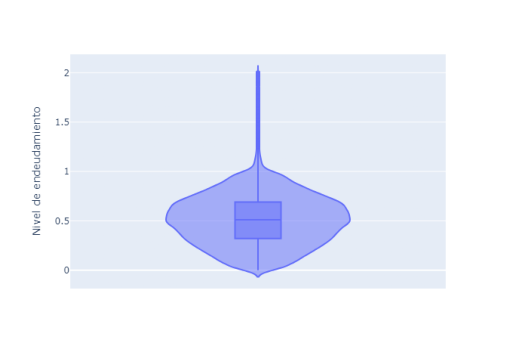

In [ ]:
with open("violin_nivel_de_endeudamiento.pkl", "rb") as f:
    fig = pickle.load(f)

fig



Este grafico muestra una alta concentración de datos alrededor del rango intercuartil, con valores medios cercanos a 0.5, lo que confirma que la mayoría de las empresas tienen un nivel de endeudamiento moderado. Las colas extendidas hacia los valores superiores reflejan la presencia de empresas con altos niveles de endeudamiento.

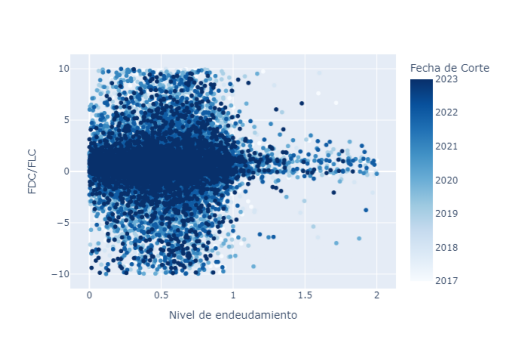

In [ ]:
with open("correlacion_nivel_de_endeudamiento.pkl", "rb") as f:
    fig = pickle.load(f)

fig

El gráfico de dispersión muestra la relación entre el nivel de endeudamiento y el FDC/FLC, segmentada por año. No se observa una correlación clara entre ambas variables, ya que los puntos están distribuidos uniformemente en el eje vertical. La densidad más alta se encuentra en niveles de endeudamiento moderados (alrededor de 0.5), lo que sugiere que las empresas con estos niveles tienden a mantener una relación equilibrada entre deuda y generación de flujo de caja libre.

## Ratio como variable objetivo

El ratio FDC/FLC fue seleccionado como la variable objetivo para este análisis porque permite evaluar de manera directa la capacidad de las empresas para cubrir sus obligaciones financieras con el flujo de caja libre generado. Este indicador es particularmente relevante ya que proporciona una visión integral de la sostenibilidad financiera, categorizando a las empresas según su capacidad para afrontar sus deudas.

In [ ]:
summary = data.groupby("Fecha de Corte")["FDC/FLC"].describe()[["count", "mean", "std", "min", "25%", "50%", "75%", "max"]]

,count,mean,std,min,25%,50%,75%,max
Fecha de Corte,,,,,,,,
2017,4357.0,0.567283,43.961329,-1141.373882,-7.709130e-02,0.665267,1.187729,1.785533e+03
2018,4078.0,6.104428,341.435758,-1045.145711,-7.204549e-02,0.669508,1.186394,2.164360e+04
2019,5278.0,0.730954,49.508592,-1883.207960,-7.739292e-02,0.656616,1.198563,1.414194e+03
2020,5832.0,570.290686,43238.341443,-1918.399038,6.370954e-03,0.757025,1.171325,3.301999e+06
2021,5895.0,0.491734,25.094648,-758.695202,7.641435e-07,0.724434,1.124769,8.685242e+02
2022,5910.0,0.596987,79.449556,-4453.707269,-7.689910e-04,0.755153,1.110945,2.409303e+03
2023,5818.0,-3.778404,234.413132,-16196.547529,-3.369933e-02,0.656644,1.096296,1.304555e+03


La tabla muestra una alta variabilidad en los datos, evidenciada por las desviaciones estándar significativamente mayores que los promedios, especialmente en años como 2020 y 2023, debido a valores extremos en los mínimos y máximos. Aunque la mediana y los percentiles (25% y 75%) permanecen relativamente estables, con valores entre -0.07 y 1.18, lo que refleja un comportamiento consistente para la mayoría de las empresas, los valores extremos negativos y positivos (como -16,196 en 2023 y 3,301,999 en 2020) indican la presencia de empresas con dificultades financieras graves o con capacidad excepcional de generación de flujo de caja libre.

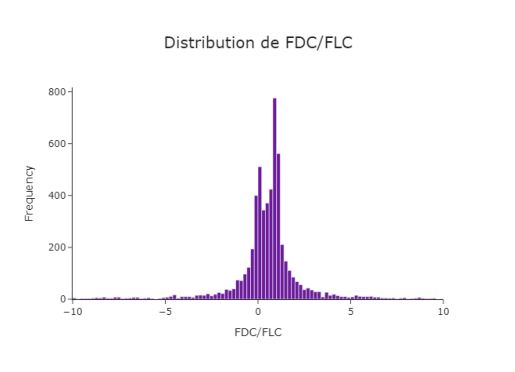

In [ ]:

fig = px.histogram(
    data,
    x="FDC/FLC",
    nbins=100,  
    title="Distribution de FDC/FLC",
    template="simple_white",
    color_discrete_sequence=["#6a1b9a"]
)

fig.update_layout(
    xaxis_title="FDC/FLC",
    yaxis_title="Frequency",
    title_font=dict(size=20),
    title_x=0.5 
)

fig.show()

La distribución  **FDC/FLC** presenta con una alta concentración de valores cercanos a cero y una disminución simétrica hacia los extremos positivos y negativos. Esto sugiere que la mayoría de las empresas tienen una capacidad moderada para generar flujo de caja libre en relación con sus obligaciones financieras. Los valores extremos reflejan casos de empresas con capacidad excepcional para cubrir deudas o, en el otro extremo, con dificultades significativas para hacerlo.

In [ ]:
bins = [-np.inf, 0, 0.67, 0.80, 1, np.inf]
labels = ['<0', '[0, 0.67)', '[0.67, 0.80)', '[0.80, 1)', '[1, ∞)']

data['FDC_FLC_categoria'] = pd.cut(data['FDC/FLC'], bins=bins, labels=labels, right=False)

En este código se realiza una categorización de los valores de la variable `FDC/FLC` mediante la creación de intervalos predefinidos. Los datos continuos del ratio se agrupan en categorías con límites específicos, y a cada intervalo se le asigna una etiqueta representativa. Esto permite clasificar los valores del ratio en rangos significativos, facilitando su análisis e interpretación en términos de grupos discretos, como niveles de desempeño financiero o capacidad para cubrir obligaciones. La categorización es especialmente útil para análisis comparativos o modelos que requieran variables categóricas.

Cantidad de empresas segun su categoria, con un total de 5832 en el año **2020**

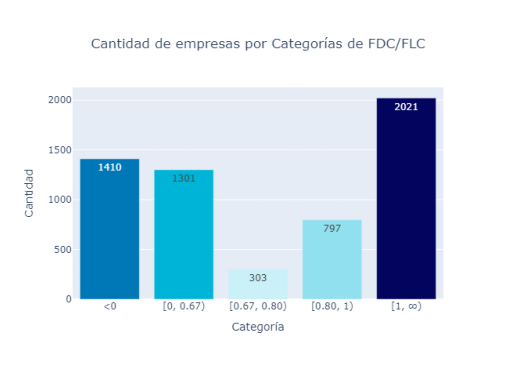

In [67]:
category_counts = data['FDC_FLC_categoria'].value_counts(sort=False).reset_index()
category_counts.columns = ['Categoria', 'Cantidad']
colors = ['#0077b6', '#00b4d8', '#caf0f8', '#90e0ef', '#03045e'] 

fig = px.bar(
    category_counts,
    x='Categoria',
    y='Cantidad',
    title=' Cantidad de empresas por Categorías de FDC/FLC ',
    labels={'Categoria': 'Categoría', 'Cantidad': 'Cantidad'},
    text='Cantidad'
)
fig.update_traces(marker=dict(color=colors))

fig.update_layout(
    xaxis_title="Categoría",
    yaxis_title="Cantidad",
    title_x=0.5, 
)
with open("barras_3.pkl", "wb") as f:
    pickle.dump(fig, f)

fig.show()

Cantidad de empresas segun su categoria, con un total de 5278 en el año **2019**

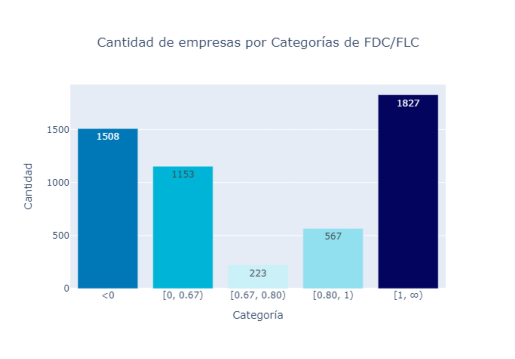

In [ ]:
category_counts = data['FDC_FLC_categoria'].value_counts(sort=False).reset_index()
category_counts.columns = ['Categoria', 'Cantidad']
colors = ['#0077b6', '#00b4d8', '#caf0f8', '#90e0ef', '#03045e'] 
# Crear el diagrama de barras con Plotly
fig = px.bar(
    category_counts,
    x='Categoria',
    y='Cantidad',
    title=' Cantidad de empresas por Categorías de FDC/FLC ',
    labels={'Categoria': 'Categoría', 'Cantidad': 'Cantidad'},
    text='Cantidad' # Usar la categoría para asignar colores
)
fig.update_traces(marker=dict(color=colors))
# Personalizar el diseño
fig.update_layout(
    xaxis_title="Categoría",
    yaxis_title="Cantidad",
    title_x=0.5, 
)
with open("barras_2.pkl", "wb") as f:
    pickle.dump(fig, f)
fig.show()

Comparando las distribuciones de empresas por categorías de FDC/FLC entre 2019 y 2020, se observan diferencias significativas que podrían estar relacionadas con eventos económicos globales y nacionales, como la pandemia de COVID-19 en 2020.

En 2019, un mayor número de empresas (1,827) se encuentra en la categoría [1, ∞), lo que indica una sólida capacidad de cubrir sus deudas, mientras que 1,508 empresas están en la categoría <0, lo que sugiere dificultades financieras importantes. La distribución general refleja un escenario más equilibrado, típico de un año con operaciones más estables.

En 2020, hay un aumento en el número de empresas en la categoría <0 (1,410), aunque disminuye levemente en comparación con 2019. Sin embargo, se observa un incremento significativo en la categoría [1, ∞) (2,021 empresas), lo que podría estar relacionado con medidas adoptadas durante la pandemia, como reducción de gastos, acceso a ayudas gubernamentales, reestructuración de deudas o adaptaciones rápidas en ciertos sectores económicos.

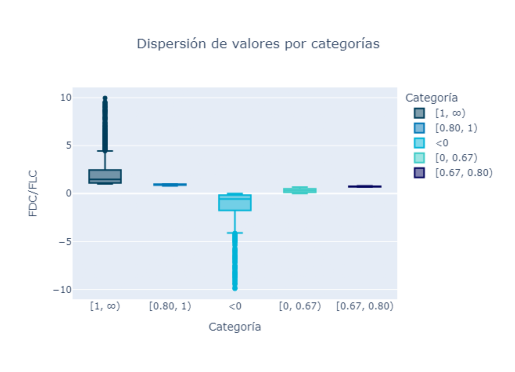

In [ ]:
fig = px.box(
    data,
    x="FDC_FLC_categoria",
    y="FDC/FLC",
    title="Dispersión de valores por categorías",
    labels={"FDC/FLC": "Variable Numérica", "FDC_FLC_categoria": "Categoría"},
    color="FDC_FLC_categoria",  # Asignar color a las categorías
    color_discrete_sequence=["#003f5c", '#0077b6', '#00b4d8', '#3dccc7', '#03045e'] # Colores personalizados
)
# Personalizar el diseño
fig.update_layout(
    title_x=0.5,  # Centrar el título
    xaxis_title="Categoría",
    yaxis_title="FDC/FLC",
)
with open("violin_6.pkl", "wb") as f:
    pickle.dump(fig, f)
# Mostrar el gráfico
fig.show()

La categoría `[1, ∞)` presenta valores positivos significativamente dispersos, con una mediana claramente por encima de 1, lo que refleja empresas con una alta capacidad para cubrir sus deudas. Sin embargo, también se identifican valores atípicos que extienden la dispersión hacia rangos aún mayores.

Las categorías intermedias (`[0.80, 1)`, `[0.67, 0.80)` y `[0, 0.67)`) muestran rangos más estrechos y concentrados alrededor de sus medianas, lo que indica un comportamiento financiero más estable pero moderado en comparación con las empresas en la categoría superior.

La categoría `<0` destaca por su dispersión hacia valores negativos extremos, lo que representa empresas con flujos de caja insuficientes para cubrir sus obligaciones financieras. Esto refleja mayores riesgos financieros y vulnerabilidades, especialmente en contextos económicos adversos.


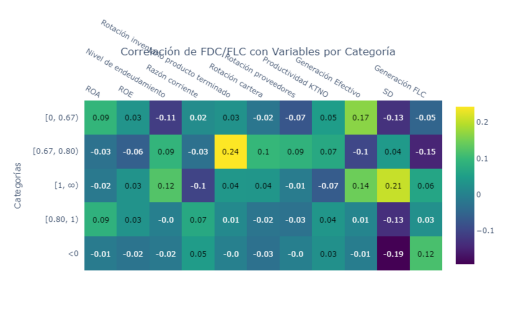

In [ ]:
categorias = data["FDC_FLC_categoria"].unique()

# Variables a correlacionar
variables = ["ROA", "ROE",'Nivel de endeudamiento','Razón corriente','Rotación inventario producto terminado',
    'Rotación cartera', 'Rotación proveedores', 'Productividad KTNO','Generación Efectivo',
    'SD', 'Generación FLC']

# Preparar la matriz de correlación combinada
matriz_correlacion = []
categorias_labels = []

# Calcular las correlaciones por cada categoría
for categoria in categorias:
    # Filtrar datos por categoría
    data_filtrada = data[data["FDC_FLC_categoria"] == categoria]
    
    # Verificar si hay suficientes datos para calcular la correlación
    if len(data_filtrada) > 1:  # Al menos 2 filas son necesarias para calcular correlaciones
        # Calcular correlación de FDC/FLC con otras variables
        correlacion = data_filtrada[["FDC/FLC"] + variables].corr().loc["FDC/FLC", variables]
        
        # Añadir la fila de correlaciones a la matriz
        matriz_correlacion.append(correlacion.values)
        categorias_labels.append(categoria)
    else:
        print(f"Categoría '{categoria}' no tiene suficientes datos para calcular la correlación.")

# Verificar si la matriz de correlación está completa
if len(matriz_correlacion) > 0:
    # Crear el gráfico de matriz de calor combinado
    fig = ff.create_annotated_heatmap(
        z=np.array(matriz_correlacion),
        x=variables,  # Variables
        y=categorias_labels,  # Categorías como filas
        annotation_text=np.round(matriz_correlacion, 2),
        colorscale="Viridis",
        showscale=True
    )

    # Personalizar el diseño del gráfico
    fig.update_layout(
        title="Correlación de FDC/FLC con Variables por Categoría",
        title_x=0.5,
        yaxis_title="Categorías",
        width=800,
        height=500
    )

    # Mostrar el gráfico
    fig.show()
else:
    print("No se pudieron calcular correlaciones suficientes para generar la matriz.")


En general, el mapa de calor revela algunos leves patrones consistentes entre la capacidad de las empresas para cubrir sus deudas (medida por el ratio FDC/FLC) y variables clave como rentabilidad, manejo de deudas y eficiencia operativa. Esto subraya la importancia de estas métricas en la evaluación de la salud financiera empresarial.